# GeoPandas Intro

## Learning Objective's

1. Read & Write Geospatial Files

In [2]:
import pandas as pd
import osmnx as ox
import geopandas as gp
from shapely.geometry import Point, Polygon
import fiona

pd.options.display.max_rows = 10
%matplotlib inline

## Read and Write GeoSpatial files

Geopandas has the capabilities to read several different GIS file formats. It does this by utilizing the fiona library imported above.

#### The GIS File format used in GeoPandas is:

* *GeoJSON *(.geoJSON)
* *Shapefile's *(.shp)

#### Files Chosen: 
* *Chatanooga Bike Share Data *(Point) (.geoJSON)
* *United States Metropolitian Areas Data *(Polygonal) (.geoJSON)

In [139]:
#Read in the geojson files for GeoPandas (Points)
bike_stations = gp.read_file("/Users/Jaseibert/dev/Geospatial_Presentation/Chattanooga_BikeStations.geojson")

In [140]:
#What does the Chattannooga Dataset look like?
bike_stations.head()

,station_id,name,address,bike_capacity,geometry
0,1297,100 Manufacturers Rd,100 Manufacturers Rd,19,POINT (-85.310469 35.063014)
1,1299,200 River St Outdoor Chattanooga,200 River St,25,POINT (-85.306574 35.06141)
2,1301,301 Manufacturers Rd,301 Manufacturers Rd,15,POINT (-85.31521100000001 35.063304)
3,1303,215 Broad St,215 Broad St,19,POINT (-85.310925 35.053928)
4,1305,Market St & E 14th St,Market St & E 14th St,19,POINT (-85.30726900000001 35.036904)


In [141]:
#Read in the geojson files for GeoPandas (Polygons)
Metro_Areas = gp.read_file("/Users/Jaseibert/dev/Geospatial_Presentation/MetroAreas.json")

In [142]:
#What does the Metro Dataset look like?
Metro_Areas.head()

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,,43620,310M300US43620,43620,"Sioux Falls, SD",M1,6670244321,27912960,"POLYGON ((-97.60851699999999 43.849059, -97.55..."
1,357,12660,310M300US12660,12660,"Baraboo, WI",M2,2153665639,45713371,"POLYGON ((-89.785809 43.641049, -89.7829349999..."
2,,40220,310M300US40220,40220,"Roanoke, VA",M1,4836707818,72498836,"POLYGON ((-79.498699 37.532797, -79.5028559999..."
3,,48660,310M300US48660,48660,"Wichita Falls, TX",M1,6784787155,144176388,"POLYGON ((-98.95308799999999 33.834, -98.95308..."
4,290,22840,310M300US22840,22840,"Fort Payne, AL",M2,2012676476,4121538,"POLYGON ((-86.057712 34.475994, -86.0557209999..."


## Geometric & Data Classifications 

In [143]:
#The DataFrame "bike_stations" is classified as a GeoDataFrame
type(bike_stations)

geopandas.geodataframe.GeoDataFrame

In [144]:
#What is the structure of the "Point-type" geometric variable within the DataFrame
bike_stations.geometry

0             POINT (-85.310469 35.063014)
1              POINT (-85.306574 35.06141)
2     POINT (-85.31521100000001 35.063304)
3             POINT (-85.310925 35.053928)
4     POINT (-85.30726900000001 35.036904)
                      ...                 
33            POINT (-85.323739 35.050405)
34    POINT (-85.27403099999999 35.065416)
35            POINT (-85.301804 35.043238)
36            POINT (-85.324018 35.019621)
37            POINT (-85.313087 35.047222)
Name: geometry, Length: 38, dtype: object

In [145]:
#What is the type characterization of this geometic variable (Point, Polygon, or Linestring)
#Uses Shapely to define the Geometric variables
type(bike_stations.geometry[0])

shapely.geometry.point.Point

## Statistical Analysis

In [146]:
bike_stations.notnull()

,station_id,name,address,bike_capacity,geometry
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
33,True,True,True,True,True
34,True,True,True,True,True
35,True,True,True,True,True
36,True,True,True,True,True


In [147]:
#Define the relative % of non-null values
bike_stations.notnull().sum() *100/ bike_stations.shape[0]

station_id       100.0
name             100.0
address          100.0
bike_capacity    100.0
geometry         100.0
dtype: float64

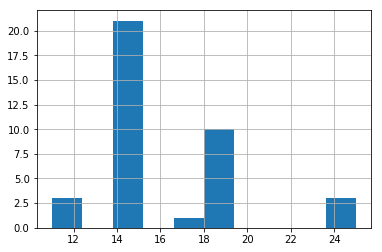

In [148]:
bike_stations['bike_capacity'].hist()

In [149]:
Metro_Areas.geometry.area

0      0.745438
1      0.244471
2      0.498821
3      0.674262
4      0.197868
         ...   
940    0.736616
941    0.066070
942    0.163277
943    0.204123
944    0.377751
Length: 945, dtype: float64

## Coordinate Reference Systems

In [150]:
# What type of Coordinate Reference System are we using?
bike_stations.crs

{'init': 'epsg:4326'}

In [151]:
# What do the geometric objects look like?
bike_stations.geometry.head(5)

0            POINT (-85.310469 35.063014)
1             POINT (-85.306574 35.06141)
2    POINT (-85.31521100000001 35.063304)
3            POINT (-85.310925 35.053928)
4    POINT (-85.30726900000001 35.036904)
Name: geometry, dtype: object

In [152]:
# Define a new variable to hold an alternate WGS84 Datum which uses "Kilometers" as the units of Measurement
bike_stations2 = bike_stations.to_crs("+proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=km +no_defs ")

In [153]:
bike_stations2.geometry.head(5)

0      POINT (-6836.12785484971 9731.20083476883)
1    POINT (-6836.404152988638 9730.571035281266)
2    POINT (-6836.110236822123 9731.951319575694)
3    POINT (-6837.874027102133 9731.184074963834)
4    POINT (-6841.110518607886 9730.440880373744)
Name: geometry, dtype: object

In [154]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(scheme='http')
location = geolocator.geocode("318 main street Evansville Indiana")
InnovationPointe = Point(location.longitude, location.latitude)
print(InnovationPointe)

POINT (-87.571961720803 37.9712424718325)


In [155]:
#Verify and Check that Innovation Pointe is in the correct Metro Area
Metro_Areas[Metro_Areas.contains(InnovationPointe)]

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
13,,21780,310M300US21780,21780,"Evansville, IN-KY",M1,3793163206,125457459,"POLYGON ((-87.31689299999999 38.246077, -87.29..."


In [156]:
#The distance in degrees from Innovation Pointe to the Bike Share Stations
bike_stations.geometry.distance(InnovationPointe)

0     3.684039
1     3.687697
2     3.680901
3     3.690936
4     3.706639
        ...   
33    3.685892
34    3.704634
35    3.704973
36    3.710164
37    3.694917
Length: 38, dtype: float64

# Visualize your Geospatial Data (GeoPandas)

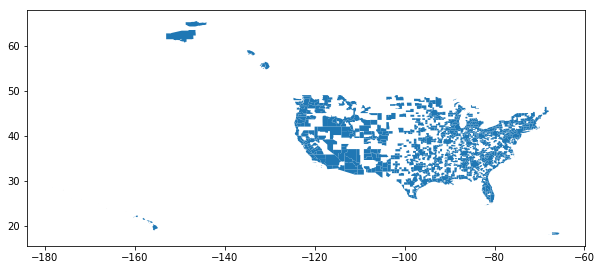

In [157]:
Metro_Areas.plot(figsize=(10,10))

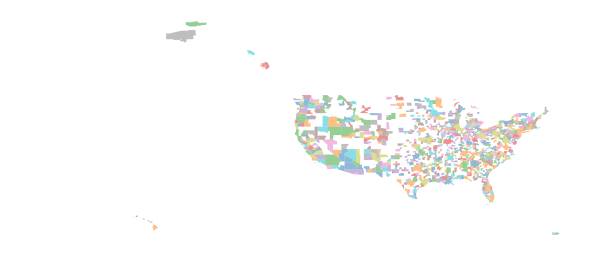

In [158]:
color = Metro_Areas.plot(figsize=(10,10), cmap = 'tab10', alpha=0.5)
color.set_axis_off()

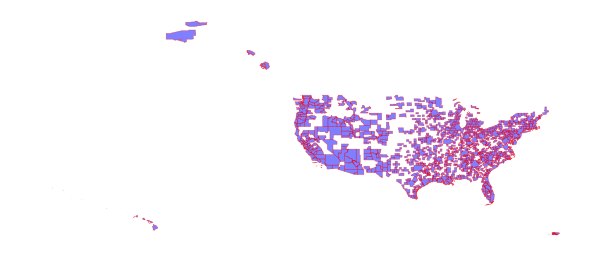

In [159]:
color = Metro_Areas.plot(figsize=(10,10), edgecolor='r', facecolor='b', alpha=0.5, linewidth = 0.5)
color.set_axis_off()

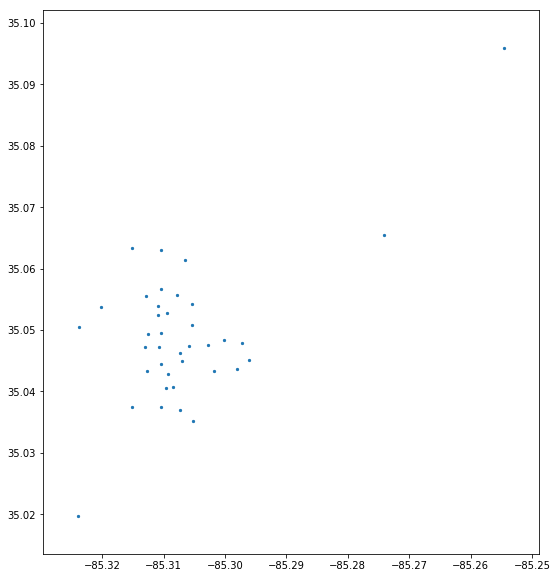

In [160]:
bike_stations.plot(markersize=5,figsize=(10,10))

In [161]:
Chattanooga = ox.graph_from_place('Chattanooga, United States', network_type='drive')
ox.save_graph_shapefile(Chattanooga, 'openstreetmap_Chat', folder='.')

In [162]:
streets = gp.read_file("openstreetmap_Chat/edges/")

In [163]:
streets.head()

,bridge,from,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,to,tunnel,geometry
0,,202702861,residential,,0,,186.07599999999996,,Siskin Drive,False,19506123,,202702855,,"LINESTRING (-85.29285539999999 35.0506845, -85..."
1,,202644811,residential,,0,,139.967,,Davidson Road,False,19503169,,202637320,,"LINESTRING (-85.15593509999999 34.9982735, -85..."
2,,2489599648,residential,,0,,65.186,,Davidson Road,False,19503169,,202637320,,"LINESTRING (-85.1579806 34.9990457, -85.157331..."
3,,202641362,residential,,0,,497.22,,"['Charlotte Avenue', 'Dudley Road']",False,"[19514289, 19497885]",,202637320,,"LINESTRING (-85.1546025 35.0018541, -85.155489..."
4,,202670917,secondary,,0,,12.782,,St Elmo Avenue,False,51065771,SR 17;SR 58,2664431625,,"LINESTRING (-85.3283406 35.0083561, -85.328288..."


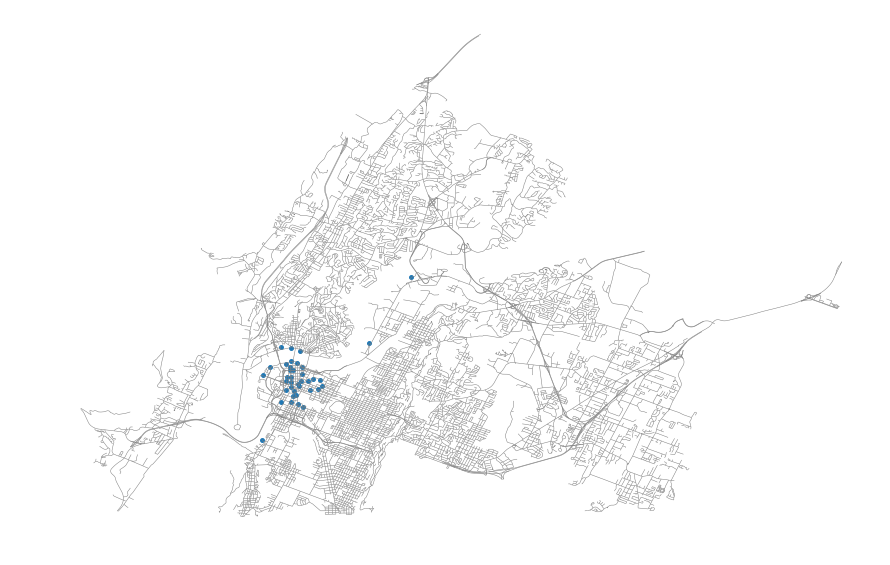

In [164]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))
bike_stations.plot(ax=ax, markersize=15)
ax.set_axis_off()

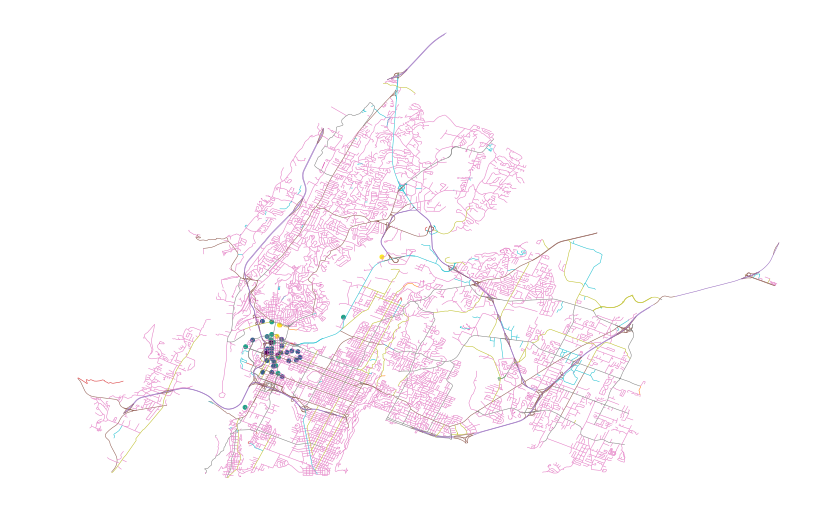

In [165]:
ax = streets.plot(linewidth=0.5, column='highway', figsize=(15, 9))
bike_stations.plot(ax=ax, column='bike_capacity', markersize=15)
ax.set_axis_off()

# Spatial Joins

In [166]:
bike_stations = gp.sjoin(bike_stations, Metro_Areas[['NAME', 'geometry']]).copy()

In [167]:
bike_stations.head()

,station_id,name,address,bike_capacity,geometry,index_right,NAME
0,1297,100 Manufacturers Rd,100 Manufacturers Rd,19,POINT (-85.310469 35.063014),150,"Chattanooga, TN-GA"
1,1299,200 River St Outdoor Chattanooga,200 River St,25,POINT (-85.306574 35.06141),150,"Chattanooga, TN-GA"
2,1301,301 Manufacturers Rd,301 Manufacturers Rd,15,POINT (-85.31521100000001 35.063304),150,"Chattanooga, TN-GA"
3,1303,215 Broad St,215 Broad St,19,POINT (-85.310925 35.053928),150,"Chattanooga, TN-GA"
4,1305,Market St & E 14th St,Market St & E 14th St,19,POINT (-85.30726900000001 35.036904),150,"Chattanooga, TN-GA"


# Folium Intro 

1. Read & Write files


In [168]:
import folium
import os
from folium import plugins
from folium.plugins import Draw
import pandas as pd

print(folium.__version__)

0.5.0


In [169]:
bike_stations_csv = pd.read_csv("/Users/Jaseibert/dev/Geospatial_Presentation/Chattanooga_BikeStationList.csv")
bike_df = pd.DataFrame(bike_stations_csv)

In [170]:
bike_df.head(5)

,station_id,name,latitude,longitude,address,bike_capacity
0,1297,100 Manufacturers Rd,35.063014,-85.310469,100 Manufacturers Rd,19
1,1299,200 River St Outdoor Chattanooga,35.061410,-85.306574,200 River St,25
2,1301,301 Manufacturers Rd,35.063304,-85.315211,301 Manufacturers Rd,15
3,1303,215 Broad St,35.053928,-85.310925,215 Broad St,19
4,1305,Market St & E 14th St,35.036904,-85.307269,Market St & E 14th St,19


In [171]:
bike_df.isnull().sum()

station_id       0
name             0
latitude         0
longitude        0
address          0
bike_capacity    0
dtype: int64

In [172]:
#Combine the Lat & Long values into a location var
location = bike_df[['latitude','longitude']]

#Transform the NaN values into (0,0) 
#location.fillna(0, inplace=True)

#Transform the location values into a list
locationList = location.values.tolist()
len(locationList)

#check random var
locationList[23]

[35.047205, -85.310675]

In [173]:
#Define initial map parameters
Chat_Coordinates = (35.06, -85.31)

In [174]:
#Create empty map zoomed in on Chattanooga, TN
map = folium.Map(location= Chat_Coordinates,tiles='CartoDB dark_matter', zoom_start=11)
marker_cluster = folium.plugins.MarkerCluster().add_to(map)

draw = Draw()
draw.add_to(map)

#Create a for loop & itterate through each store location 
for loc in range(0, len(locationList)):
    folium.Marker(locationList[loc], popup=bike_df['name'][loc], icon=folium.Icon(color='green', icon_color='white', icon='info-sign')).add_to(marker_cluster)
map.save(os.path.join(os.path.sep,'Users', 'Jaseibert', 'Dev', 'Geospatial_Presentation','results', 'BikeShareMarkerCluster.html'))
map

In [175]:
Metro = pd.read_csv("/Users/Jaseibert/dev/Geospatial_Presentation/Combined_Metro_Data.csv")
Metro_df = pd.DataFrame(Metro)
Metro_df.isnull().sum()

GEOID                                                                                                         0
latitude                                                                                                      0
longitude                                                                                                     0
MetroName_x                                                                                                   0
2011_Current$_GDP                                                                                             0
                                                                                                             ..
AWater_SQMeters                                                                                               0
ALand_SQMiles                                                                                                 0
AWater_SQMiles                                                                                          

In [131]:
MetroLoc = Metro_df[['latitude','longitude']]
MetroLocList = MetroLoc.values.tolist()
len(MetroLocList)

381